In [9]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


In [10]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [11]:
#reshaping for same square size of 28x28
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Plot for different number of filters

In [13]:

train_acc=[]
test_acc=[]
filters=[4,32,128,512,2056]
for i in (4,32,128,512,2056):
    model=Sequential()
    model.add(Conv2D(i,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train,y_train,batch_size=32,epochs=2)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6803 - accuracy: 0.8656
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.1797 - accuracy: 0.9477
Epoch 1/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6634 - accuracy: 0.9400
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.0911 - accuracy: 0.9732
Epoch 1/2
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4839 - accuracy: 0.9508
Epoch 2/2
313/313 [==============================] - 2s 8ms/step - loss: 0.0942 - accuracy: 0.9756
Epoch 1/2
1875/1875 [==============================] - 93s 49ms/step - loss: 0.5911 - accuracy: 0.9537
Epoch 2/2
313/313 [==============================] - 7s 24ms/step - loss: 0.0827 - accuracy: 0.9759
Epoch 1/2
1875/1875 [==============================] - 272s 145ms/step - loss: 0.8847 - accuracy: 0.9553
Epoch 2/2
313/313 [==============================] - 19s 60ms/step - loss: 0.0780 - accur

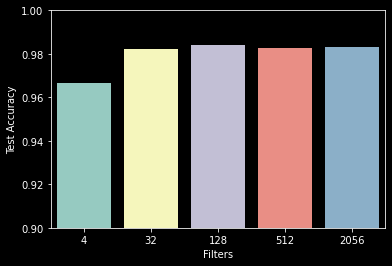

In [7]:
sns.barplot(filters,train_acc)
plt.xlabel('Filters')
plt.ylabel('Test Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)
plt.show()

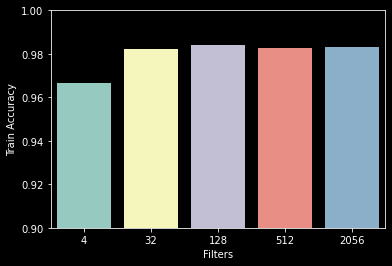

In [8]:
sns.barplot(filters,train_acc)
plt.xlabel('Filters')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)
plt.show()

Plot for different number of layers

In [30]:
train_acc=[]
test_acc=[]
for i in range(1,5):
    model=Sequential()
    for j in range(i):
        model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train,y_train,batch_size=32,epochs=2)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6809 - accuracy: 0.9381
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9703
Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2443 - accuracy: 0.9517
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9787
Epoch 1/2
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1742 - accuracy: 0.9559
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1553 - accuracy: 0.9589
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9842


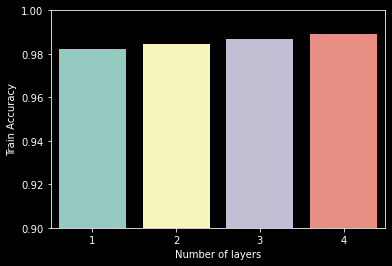

In [50]:
#plot for training accuracy
layers=[1,2,3,4]
sns.barplot(layers,train_acc)
plt.xlabel('Number of layers')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

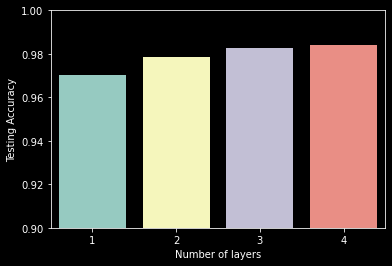

In [49]:
#plot for testing accuracies
sns.barplot(layers,test_acc)

plt.xlabel('Number of layers').set_color('white')
plt.ylabel('Testing Accuracy').set_color('white')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

For multile echops 


In [52]:
train_acc=[]
test_acc=[]
echops=[5,10,50,100]
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for i in echops:
    model.fit(x_train,y_train,batch_size=32,epochs=i)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8977 - accuracy: 0.9308
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - accuracy: 0.9771
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9703
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0407 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accu

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9990
Epoch 89/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0128 - accuracy: 0.9993
Epoch 90/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - accuracy: 0.9995
Epoch 91/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9993
Epoch 92/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0126 - accuracy: 0.9993
Epoch 93/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9992
Epoch 94/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9993
Epoch 95/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - accuracy: 0.9991
Epoch 96/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9992
Epoch 97/100
1875/1875 [==============================] - 4s 2ms/step - loss:

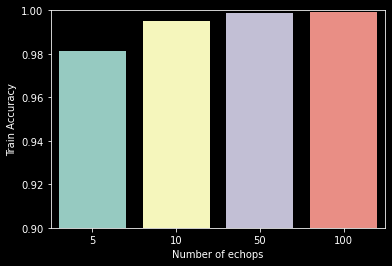

In [54]:
#plot for training accuracy

sns.barplot(echops,train_acc)
plt.xlabel('Number of echops')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

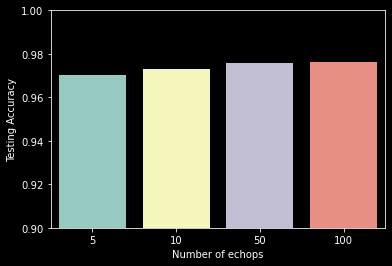

In [55]:
#plot for testing accuracies
sns.barplot(echops,test_acc)
plt.xlabel('Number of echops')
plt.ylabel('Testing Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

Different size of filters


In [62]:
train_acc=[]
test_acc=[]
size=['3x3','5x5','7x7']
for i in [3,5,7]:
    model=Sequential()
    model.add(Conv2D(16,kernel_size=(i,i),input_shape=(28,28,1),activation='relu'))
    model.add(Conv2D(16,kernel_size=(i,i),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train,y_train,batch_size=32,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3679 - accuracy: 0.9380
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9829
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9790
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3287 - accuracy: 0.9367
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9834
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0

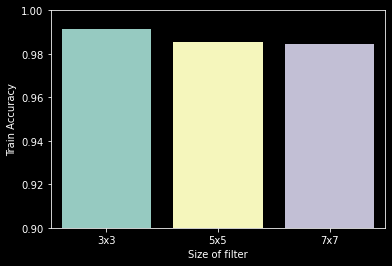

In [63]:
#plot for training accuracy
sns.barplot(size,train_acc)
plt.xlabel('Size of filter')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

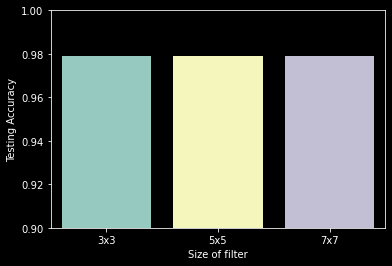

In [64]:
#plot for testing accuracies
sns.barplot(size,test_acc)
plt.xlabel('Size of filter')
plt.ylabel('Testing Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

Different Activation functions

In [65]:
filters=['Relu','Tanh','Sigmoid']
train_acc=[]
test_acc=[]

In [66]:
#activation function relu
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=2)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4272 - accuracy: 0.9380
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.9764


In [67]:
#tanh
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='tanh'))
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=2)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1408 - accuracy: 0.9575
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0658 - accuracy: 0.9797


In [68]:
#activation function sigmoid
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='sigmoid'))
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,1),activation='sigmoid'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=2)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3236 - accuracy: 0.9055
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9778


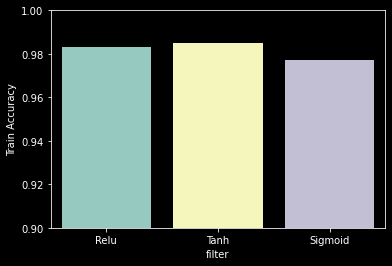

In [69]:
#plot for training accuracy

sns.barplot(filters,train_acc)
plt.xlabel('filter')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

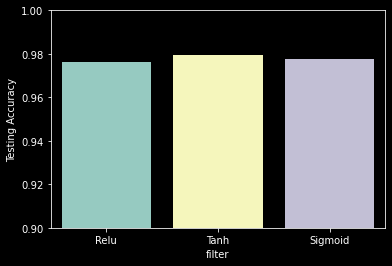

In [70]:
#plot for testing accuracies
sns.barplot(filters,test_acc)
plt.xlabel('filter')
plt.ylabel('Testing Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

Effect of stride


In [73]:
train_acc=[]
test_acc=[]
for i in range(1,4):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',strides=i))
    model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',strides=i))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train,y_train,batch_size=32,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3245 - accuracy: 0.9482
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0428 - accuracy: 0.9864
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9785
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7385 - accuracy: 0.8681
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1436 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0

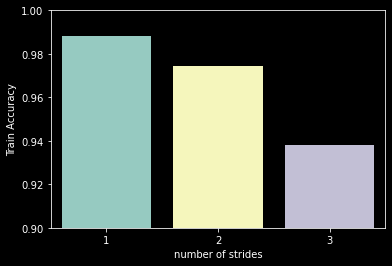

In [74]:
#plot for training accuracy

sns.barplot([1,2,3],train_acc)
plt.xlabel('number of strides')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

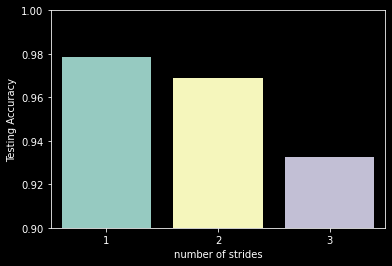

In [75]:
#plot for testing accuracies
sns.barplot([1,2,3],test_acc)
plt.xlabel('number of strides')
plt.ylabel('Testing Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

Effect of padding

In [76]:
train_acc=[]
test_acc=[]
#without padding
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=5)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2392 - accuracy: 0.9518
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9797
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9823


In [77]:
#with padding
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=5)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2059 - accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0612 - accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0396 - accuracy: 0.9879
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9842


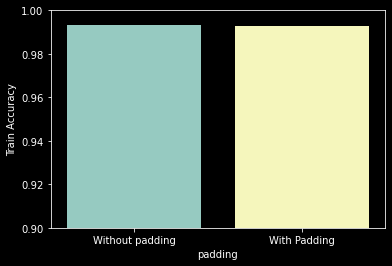

In [78]:
#plot for training accuracy

sns.barplot(['Without padding','With Padding'],train_acc)
plt.xlabel('padding')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

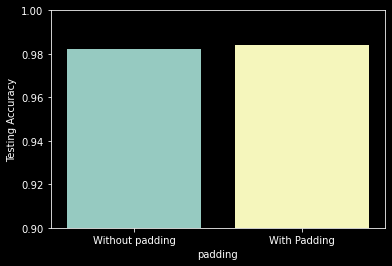

In [79]:
#plot for testing accuracies
sns.barplot(['Without padding','With Padding'],test_acc)
plt.xlabel('padding')
plt.ylabel('Testing Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

Effect of pooling

In [80]:
#without pooling
train_acc=[]
test_acc=[]

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=5)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2813 - accuracy: 0.9485
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0735 - accuracy: 0.9774
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9849
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0380 - accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9776


In [81]:
#pooling of 2x2
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=5)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2633 - accuracy: 0.9535
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9834


In [82]:
#pooling of 3x3
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=5)
train_acc.append(model.evaluate(x_train,y_train)[1])
test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3029 - accuracy: 0.9461
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0710 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0559 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9820


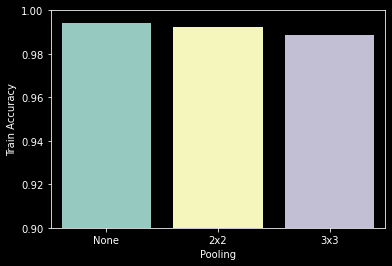

In [83]:
#plot for training accuracy

sns.barplot(['None','2x2','3x3'],train_acc)
plt.xlabel('Pooling')
plt.ylabel('Train Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()

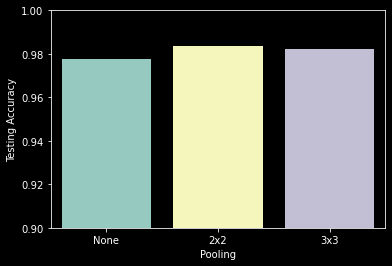

In [84]:
#plot for testing accuracies
sns.barplot(['None','2x2','3x3'],test_acc)
plt.xlabel('Pooling')
plt.ylabel('Testing Accuracy')
plt.style.use(['dark_background'])
plt.ylim(0.9,1.0)

plt.show()